In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits import mplot3d

Text(0.5, 1.0, 'The First Taylor Image')

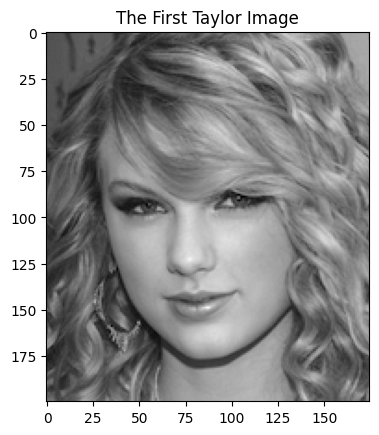

In [3]:
# all images are 200 x 175 pixels
# you can view one by loading it into Python and showing it with imshow
firstTaylorImage = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\taylor01.jpg',cv2.IMREAD_GRAYSCALE).astype(float)
plt.imshow(firstTaylorImage,cmap = 'gray')
plt.title("The First Taylor Image")

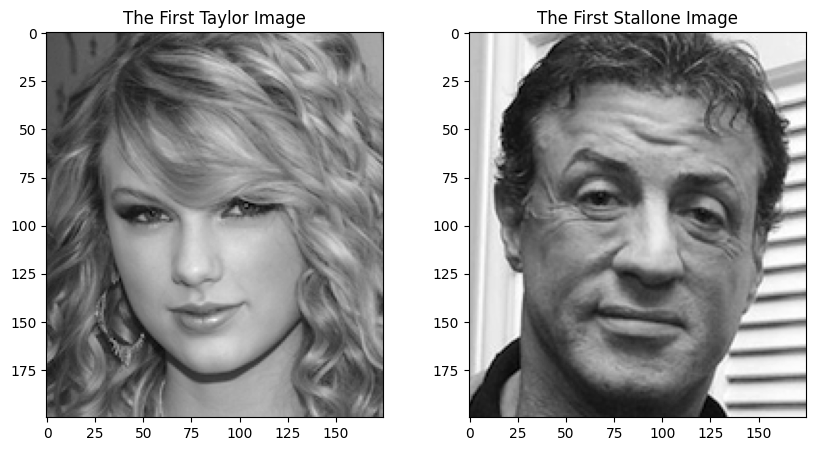

In [4]:
firstTaylorImage = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\taylor01.jpg',cv2.IMREAD_GRAYSCALE).astype(float)
firstStalloneImage = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\stallone01.jpg',cv2.IMREAD_GRAYSCALE).astype(float)

#Display images syde by side
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(firstTaylorImage, cmap='gray')
axes[0].set_title('The First Taylor Image')
axes[1].imshow(firstStalloneImage, cmap='gray')
axes[1].set_title('The First Stallone Image')
plt.show()

In [5]:
# load all the data into a single array
B = np.zeros((35000,40))

for i in range(1, 21):
    taylor = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\taylor{i:02d}.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
    sylvester = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\stallone{i:02d}.jpg', cv2.IMREAD_GRAYSCALE).astype(float)

    # Flatten the images and store in the matrix B
    B[:, i - 1] = taylor.flatten()
    B[:, 20 + i - 1] = sylvester.flatten()

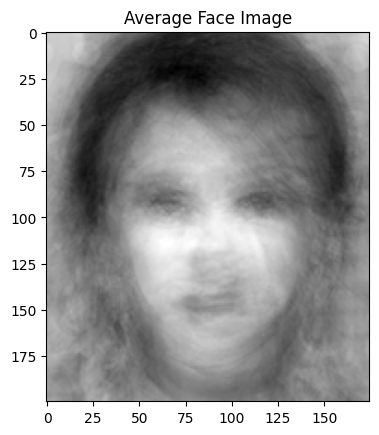

In [7]:
# Calculate mean face
mean_face = np.mean(B, axis = 1)

# Reshape mean face and display
mean_face_image = mean_face.reshape(200,175)
plt.imshow(mean_face_image, cmap='gray')
plt.title('Average Face Image')
plt.show()

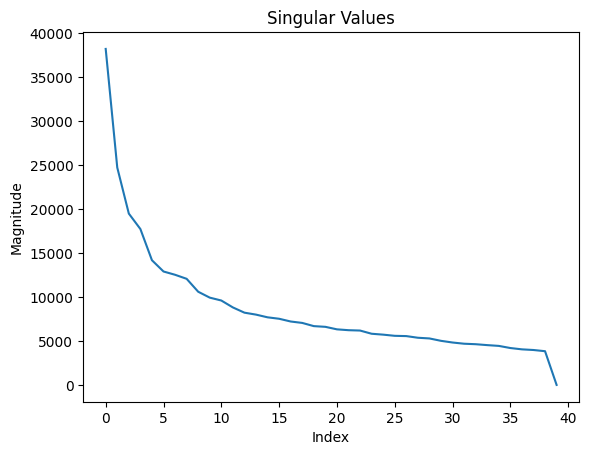

In [8]:
# Subtract the average face
B_deviation = B - mean_face[: ,np.newaxis] # transforms mean_face into a column vector


# SVD
U, S, Vt = np.linalg.svd(B_deviation, full_matrices=False)

# Plot singular values
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.show()

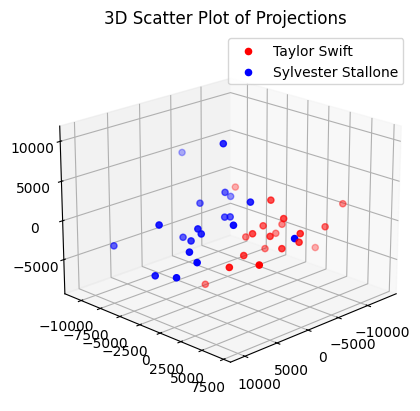

In [9]:
# 5. 
u1, u2, u3 = U[:, 0], U[:, 1], U[:, 2]
x = np.dot(u1, B_deviation)
y = np.dot(u2, B_deviation)
z = np.dot(u3, B_deviation)



# 6. 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0:20], y[0:20], z[0:20], color='red', label='Taylor Swift')
ax.scatter(x[20:], y[20:], z[20:], color='blue', label='Sylvester Stallone')
ax.view_init(elev = 20,azim = 45)
ax.set_title('3D Scatter Plot of Projections')
ax.legend()
plt.show()

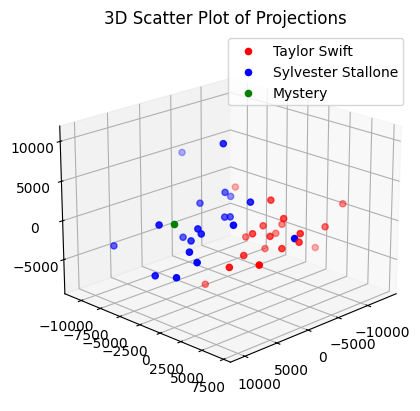

In [12]:
# 7. 
mystery_image = cv2.imread(f'F:\\2024Sp\\MATH310\\Lab\\Facial Recognition\\Faces Lab\\faces\\mystery.jpg', cv2.IMREAD_GRAYSCALE).flatten()
mystery_deviation = mystery_image - mean_face
mystery_x = np.dot(u1, mystery_deviation)
mystery_y = np.dot(u2, mystery_deviation)
mystery_z = np.dot(u3, mystery_deviation)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[0:20], y[0:20], z[0:20], color='red', label='Taylor Swift')
ax.scatter(x[20:], y[20:], z[20:], color='blue', label='Sylvester Stallone')
ax.scatter(mystery_x, mystery_y, mystery_z, color = 'green', label = "Mystery") # Add mystery image
ax.view_init(elev = 20,azim = 45)
ax.set_title('3D Scatter Plot of Projections')
ax.legend()
plt.show()

